In [170]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [171]:
# directories for train and test data
train_dir = '/Users/nolimitmide/Desktop/test/Packages'
test_dir = '/Users/nolimitmide/Desktop/test/test'

In [172]:
# Define batch size and image dimensions
batch_size = 32
image_height = 150
image_width = 150

In [196]:
# Define class-specific data augmentation parameters
data_augmentation_params = {
    'Milk': {
        'rotation_range': 20,
        'width_shift_range': 0.2,
        'height_shift_range': 0.2,
        'shear_range': 0.2,
        'zoom_range': 0.2,
        'horizontal_flip': True
    },
    'Milo': {
        'rotation_range': 30,
        'width_shift_range': 0.1,
        'height_shift_range': 0.1,
        'shear_range': 0.1,
        'zoom_range': 0.1,
        'horizontal_flip': True
    },
    'Sugar': {
        'rotation_range': 15,
        'width_shift_range': 0.15,
        'height_shift_range': 0.15,
        'shear_range': 0.15,
        'zoom_range': 0.15,
        'horizontal_flip': True
    }
}

In [207]:
# ImageDataGenerator for data preprocessing and augmentation
train_datagens = {}
for class_name, params in data_augmentation_params.items():
    train_datagens[class_name] = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        **params
    )

# Generate augmented data for each class separately
for class_name, datagen in train_datagens.items():
    print(f"Generating augmented data for class: {class_name}")
    class_dir = os.path.join(train_dir, class_name)
    output_dir = os.path.join(train_dir, f"{class_name}_augmented")
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create ImageDataGenerator for the specific class
    class_generator = datagen.flow_from_directory(
        class_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',  # Use only the training subset for augmentation
        save_to_dir=output_dir,  # Save augmented images to output directory
        save_prefix=f"{class_name}_aug",
    )
    
    # Generate augmented images
    num_augmented_images = 0
    for i, (images, _) in enumerate(class_generator):
        num_augmented_images += len(images)
        if i >= 9:  # Generate 10 batches (10 * batch_size images)
            break
    
    print(f"Generated {num_augmented_images} augmented images for class: {class_name}")


Generating augmented data for class: Milk
Found 36 images belonging to 1 classes.
Generated 180 augmented images for class: Milk
Generating augmented data for class: Milo
Found 36 images belonging to 1 classes.
Generated 180 augmented images for class: Milo
Generating augmented data for class: Sugar
Found 39 images belonging to 1 classes.
Generated 195 augmented images for class: Sugar


In [208]:
# Data generator for training
train_generator = train_datagens['Milk'].flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Use only the training subset after augmentation
)


Found 555 images belonging to 6 classes.


In [209]:
# Data generator for testing
test_generator = train_datagens['Milk'].flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Use the validation subset for testing
)

Found 136 images belonging to 6 classes.


In [210]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [211]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [212]:
# Display model architecture
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     2,367,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,461,190 (9.39 MB)

 Trainable params: 2,461,190 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [213]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3154 - loss: 1.6668 - val_accuracy: 0.3516 - val_loss: 1.4354
Epoch 2/10
 1/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4545 - loss: 1.5985

2024-05-07 22:38:39.113680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4545 - loss: 1.5985 - val_accuracy: 0.6250 - val_loss: 1.2611
Epoch 3/10


2024-05-07 22:38:39.421120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5783 - loss: 1.2782 - val_accuracy: 0.7031 - val_loss: 1.0177
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 1.1668 - val_accuracy: 0.6250 - val_loss: 0.9431
Epoch 5/10


2024-05-07 22:39:12.861583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-07 22:39:12.959434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6755 - loss: 0.9836 - val_accuracy: 0.6719 - val_loss: 0.9721
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6562 - loss: 0.9007 - val_accuracy: 0.6250 - val_loss: 1.2967
Epoch 7/10


2024-05-07 22:39:41.857795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-07 22:39:41.947996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7085 - loss: 0.8726 - val_accuracy: 0.7266 - val_loss: 0.7498
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8125 - loss: 0.6833 - val_accuracy: 0.8750 - val_loss: 0.5500
Epoch 9/10


2024-05-07 22:40:11.745449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-07 22:40:11.823947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7479 - loss: 0.7220 - val_accuracy: 0.7422 - val_loss: 0.6637
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7188 - loss: 0.6719 - val_accuracy: 0.6250 - val_loss: 0.6828


2024-05-07 22:40:45.031200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-07 22:40:45.124436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [214]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7568 - loss: 0.6404
Test Loss: 0.6836390495300293
Test Accuracy: 0.7352941036224365


TEST THE MODEL WITH IMAGES. {JUST REPLACE THE IMAGE PATH}

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [220]:
# Load an image for testing (replace 'path_to_image.jpg' with the actual path)
image_path = '/Users/nolimitmide/Desktop/test/IMG_8032 Small.jpeg'
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array /= 255.0

# Make a prediction using the loaded model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


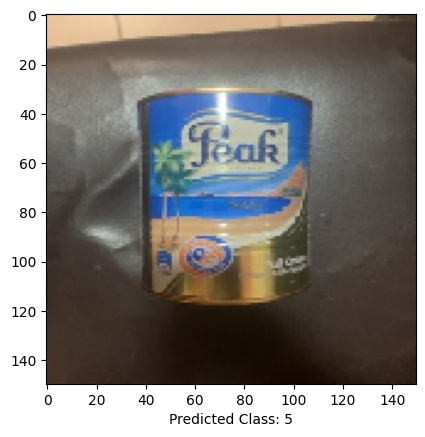

In [221]:
# Display the image and predicted class
plt.imshow(img)
plt.xlabel(f'Predicted Class: {predicted_class}')
plt.show()